In [1]:
from functions import *
from sklearn.mixture import BayesianGaussianMixture
import sklearn

In [2]:
from scipy.optimize import linear_sum_assignment
from scipy.spatial.distance import cdist

In [7]:
save_folder = r'/mnt/home/tudomlumleart/01_ChromatinEnsembleRefinement/chromatin-ensemble-refinement/figures/20240619/'

In [73]:
# Define parameters 
num_monomers = 100 
mean_bond_length = 1
std_bond_length = 20
gaussian_noise_std = 10

num_templates = 100
total_polymers = 10000
num_observation_list = np.int32(np.linspace(10, 1000, num_templates))

template_chain_list = [generate_gaussian_chain(num_monomers, mean_bond_length, std_bond_length) for i in range(num_templates)]
observation_list = [generate_observations(c, n, gaussian_noise_std) for c, n in zip(template_chain_list, num_observation_list)]

observation_list = np.concatenate([*observation_list])

In [77]:
labels_true = np.concatenate([[i for _ in range(j)] for i, j in enumerate(num_observation_list)])

In [75]:
observation_flatten = np.array([squareform(pdist(x)).flatten() for x in observation_list])
print(observation_flatten.shape)

(50500, 10000)


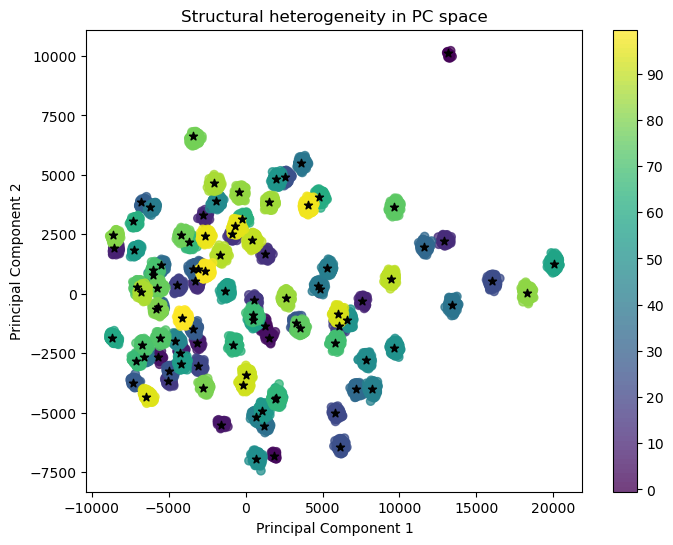

In [86]:
# Plot the PCA of these structures
# Create and fit the PCA model
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reduce to 2 components
X_pca = pca.fit_transform(observation_flatten)

true_template = np.array([squareform(pdist(x)).flatten() for x in template_chain_list])
X_true_pca = pca.transform(true_template)

# Visualize the results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_true, cmap='viridis', alpha=0.75)
plt.colorbar(boundaries=np.arange(101)-0.5).set_ticks(np.arange(0, 100, 10))
plt.scatter(X_true_pca[:, 0], X_true_pca[:, 1], marker='*', color='black')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Structural heterogeneity in PC space')
plt.savefig(save_folder+'PCA_true_cluster.png', dpi=300)
plt.show()

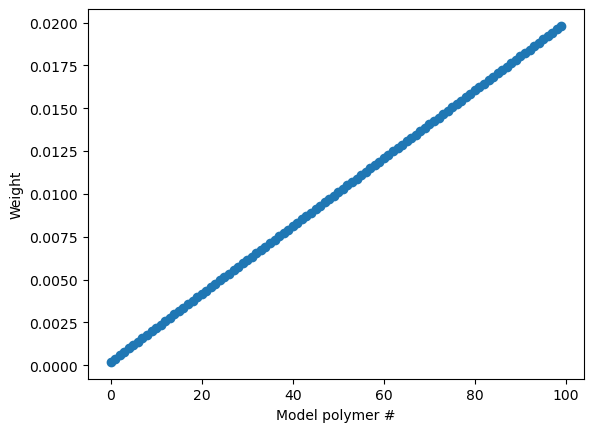

In [81]:
w = num_observation_list
plt.plot(w/w.sum(), 'o')
plt.xlabel('Model polymer #')
plt.ylabel('Weight')
plt.savefig(save_folder+'true_weights.png', dpi=300)

In [89]:
X = np.array([squareform(pdist(x)).flatten() for x in observation_list])
Y = np.concatenate([[i for _ in range(j)] for i, j in enumerate(num_observation_list)])

In [90]:
# Shuffle data 
indices = np.arange(Y.shape[0])
np.random.shuffle(indices)
X_, Y_ = X[indices], Y[indices]

In [96]:
n_comp = 50

# Create and fit the Bayesian Gaussian Mixture Model
bgmm = BayesianGaussianMixture(
    n_components=n_comp,      # Maximum number of components
    covariance_type='diag', # Type of covariance parameters
    max_iter=1000,         # Maximum number of iterations  
)
bgmm.fit(observation_flatten)

# Predict the labels of the data
labels_pred = bgmm.predict(observation_flatten)


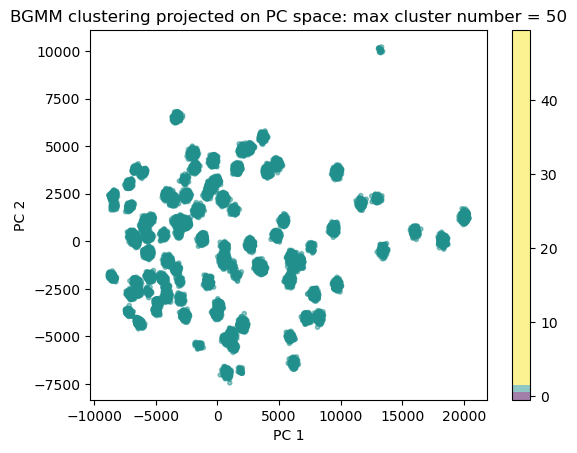

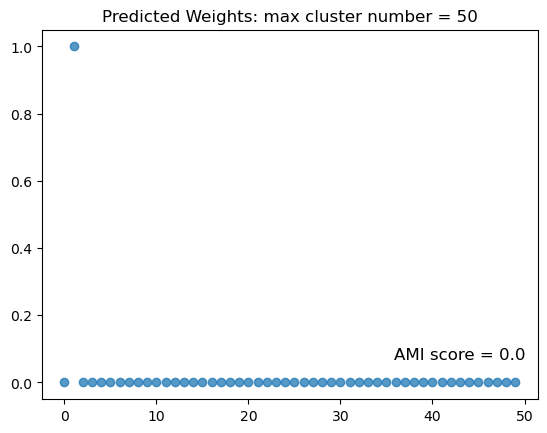

In [97]:
# Plot the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pred, marker='.', cmap='viridis', alpha=0.5)
plt.title('BGMM clustering projected on PC space: max cluster number = {}'.format(n_comp))
plt.colorbar(boundaries=np.arange(n_comp+1)-0.5).set_ticks(np.arange(0, n_comp, 10))
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.savefig(save_folder+'BGMM_{}_PCA.png'.format(n_comp), dpi=300)
plt.show()

# Accessing model parameters
weights = bgmm.weights_
means = bgmm.means_
covariances = bgmm.covariances_
conv = bgmm.converged_

AMI = sklearn.metrics.adjusted_mutual_info_score(labels_true, labels_pred)

plt.plot(weights, 'o', alpha=0.75)
plt.title('Predicted Weights: max cluster number = {}'.format(n_comp))
# plt.axhline(y=1/100, color='red')
plt.annotate(
    'AMI score = {}'.format(np.round(AMI, 3)),
    xy=(0.975, 0.1), 
    xycoords='axes fraction',
    fontsize=12, 
    color='black',
    horizontalalignment='right',
    verticalalignment='bottom'
)

plt.savefig(save_folder+'BGMM_{}_weights.png'.format(n_comp), dpi=300)

plt.show()

In [67]:
w = np.int32(np.linspace(10, 1000, num_templates))

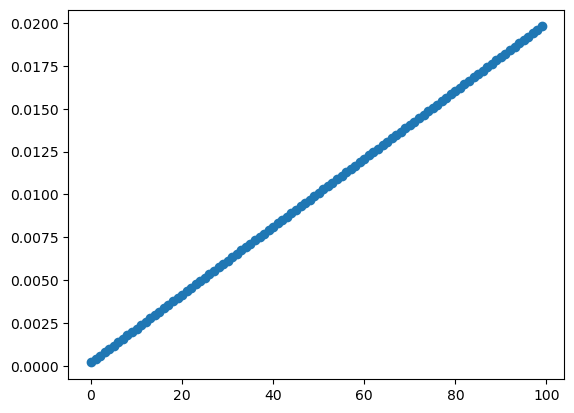

In [68]:
plt.plot(w/w.sum(), 'o')

In [71]:
(w/w.sum())[-1]*100

1.9801980198019802

Initialization 0
Initialization converged: True


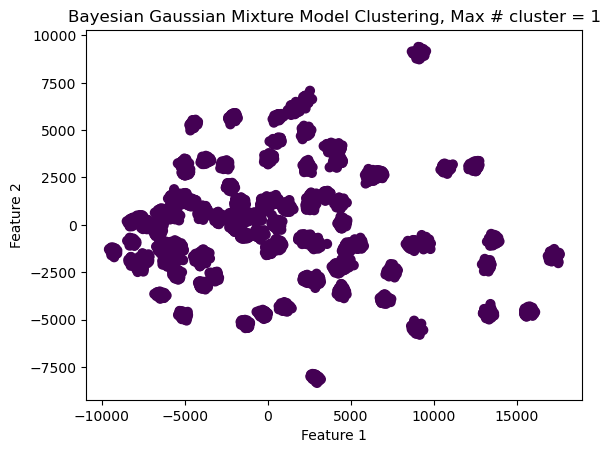

Weights: [1.]
Convergence: True
-1142617181.324039


In [49]:
n_comp = 1

bgmm = BayesianGaussianMixture(
    n_components=n_comp,      # Maximum number of components
    covariance_type='spherical', # Type of covariance parameters
    max_iter=1000,         # Maximum number of iterations  
    verbose=True 
)
bgmm.fit(observation_flatten)


# Predict the labels of the data
labels = bgmm.predict(observation_flatten)

# Plot the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=40, cmap='viridis')
plt.title('Bayesian Gaussian Mixture Model Clustering, Max # cluster = {}'.format(n_comp))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Accessing model parameters
weights = bgmm.weights_
means = bgmm.means_
print("Covariances:", covariances)
conv = bgmm.converged_

print("Weights:", weights)
# print("Means:", means)
# print("Covariances:", covariances)
print("Convergence:", conv)
print(bgmm.lower_bound_)

([<matplotlib.axis.XTick at 0x1552c09445e0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36'),
  Text(37, 0, '37'),
  Text(38, 0, '38'),
  Text(39, 0, '39'),
  Text(40, 0, '40'),
  Text(41, 0, '41'),
  Text(42, 0, '42'),
  Text(43, 0, '43'),
  Text(44, 0, '44'),
  Text(45, 0, '45'),
  Text(46, 0, '46'),
  Text(

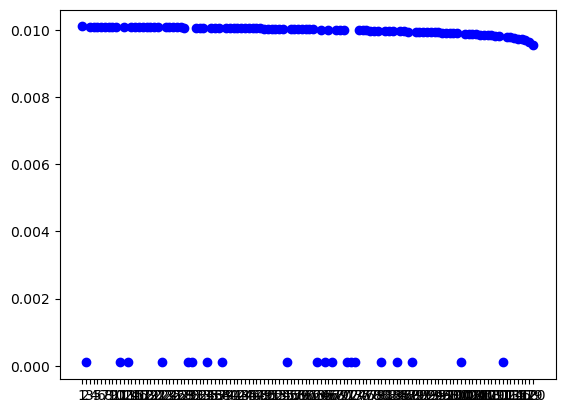

In [62]:
plt.plot(np.arange(1, 121), weights, 'bo')
plt.xticks(np.arange(1, 121))

In [18]:
means[0].shape[0]

400

In [37]:
def visualize_dmap_flatten(dmap_flat):
    dmap_size = dmap_flat.shape[0]
    dmap = np.reshape(dmap_flat, [np.int(dmap_size**0.5), -1])
    
    plt.imshow(dmap, cmap='hot')
    plt.colorbar()
    plt.show()

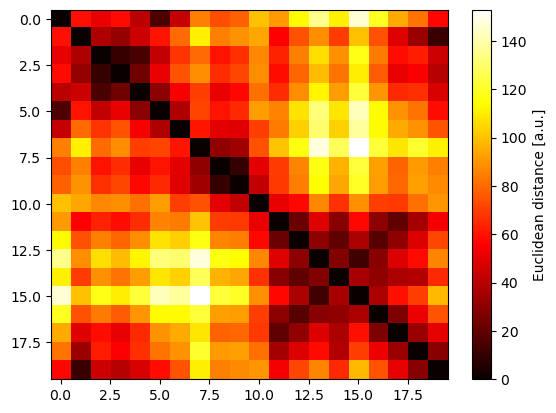

In [34]:
visualize_dmap(squareform(pdist(template_chain_list[0])))

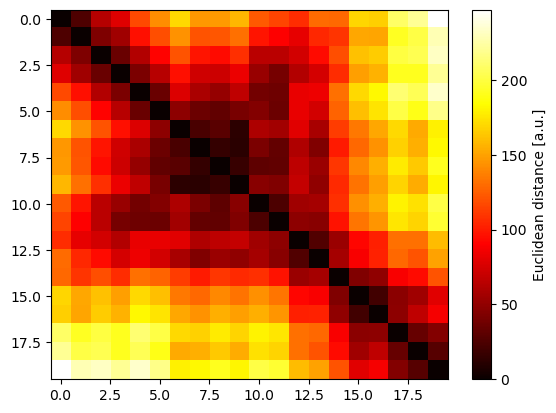

In [35]:
visualize_dmap(squareform(pdist(template_chain_list[1])))

/tmp/ipykernel_1155601/1255224061.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dmap = np.reshape(dmap_flat, [np.int(dmap_size**0.5), -1])


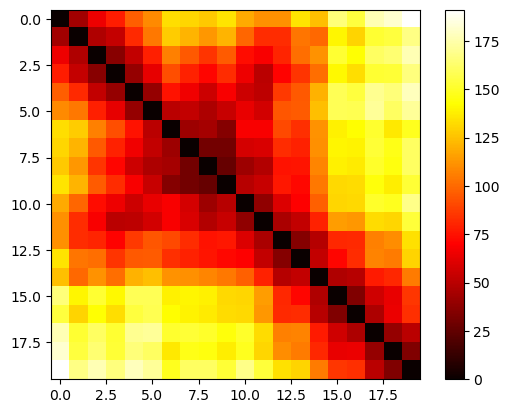

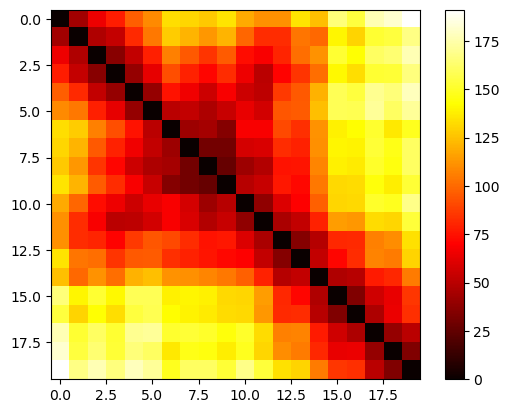

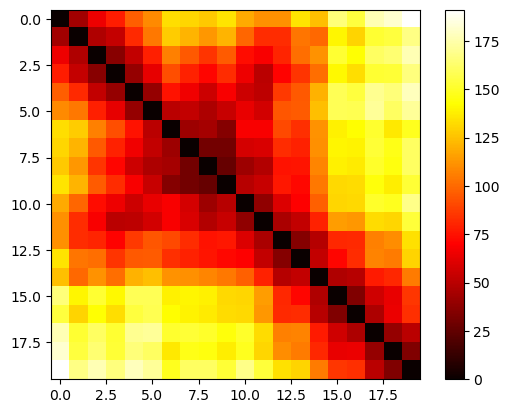

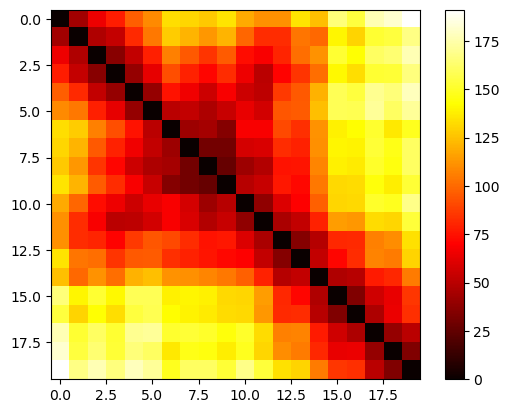

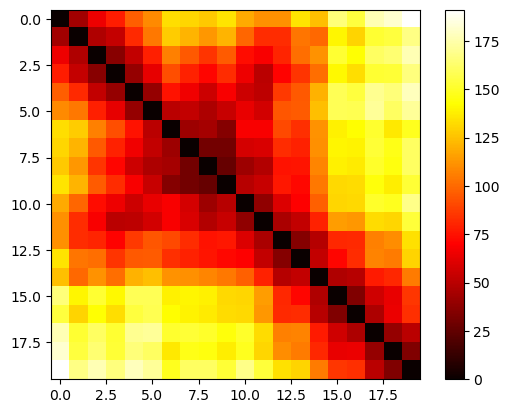

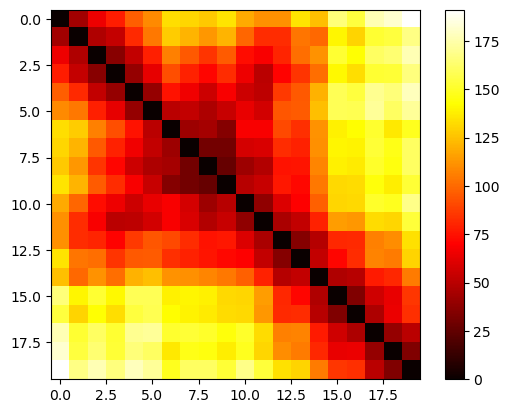

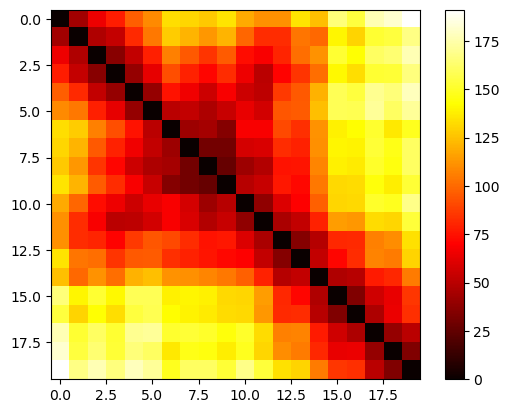

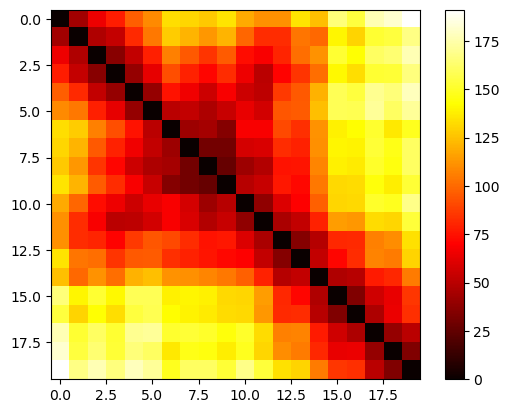

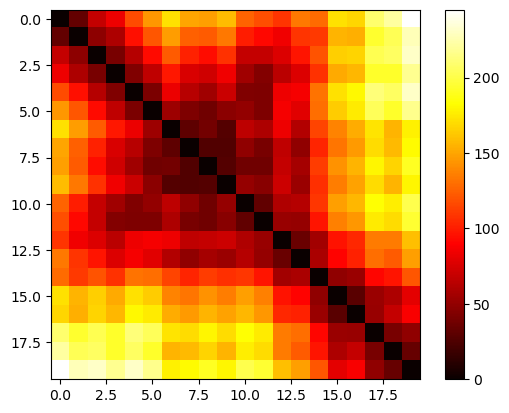

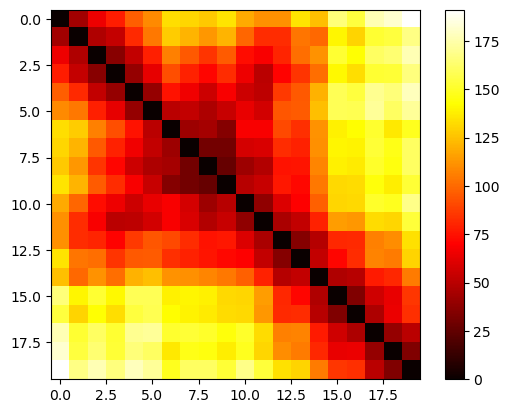

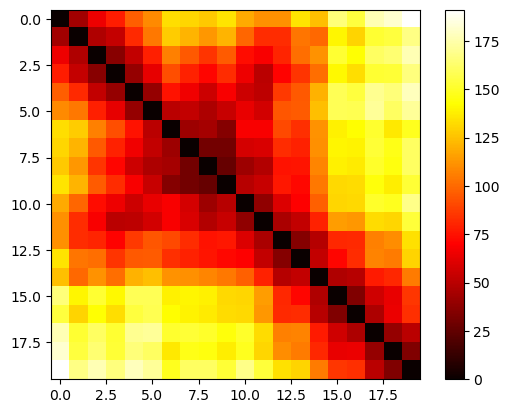

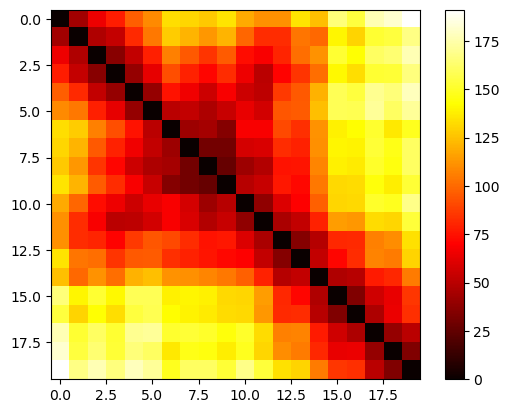

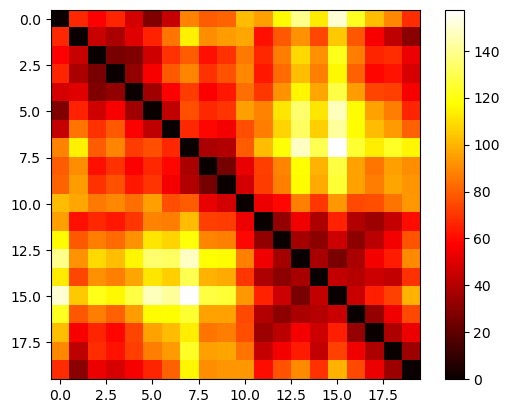

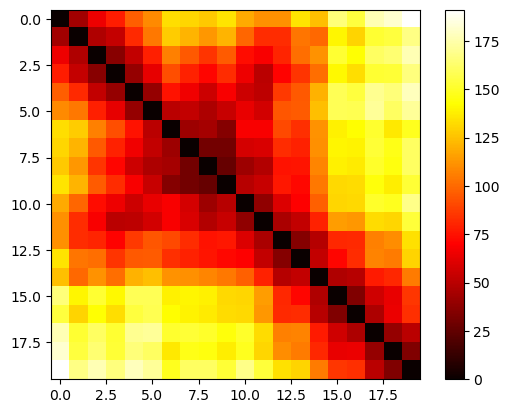

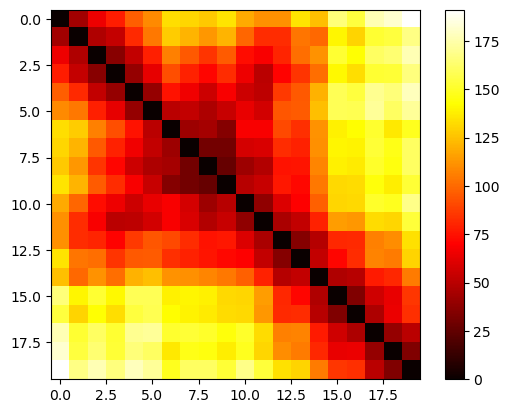

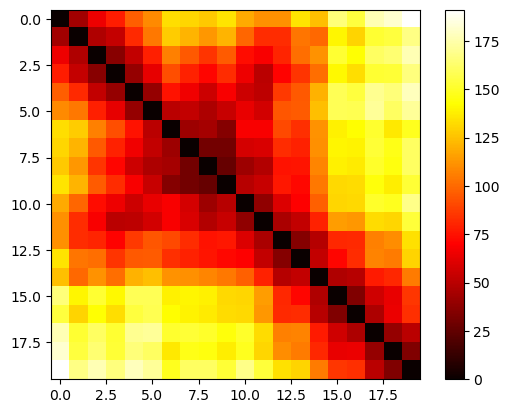

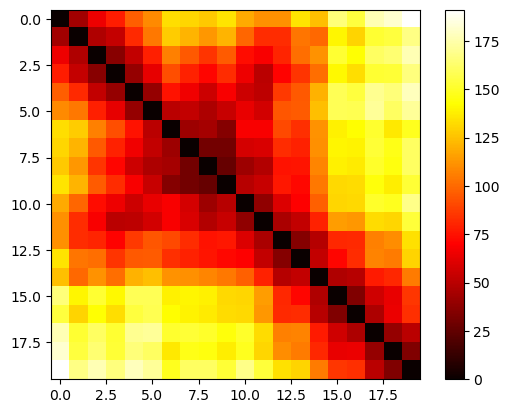

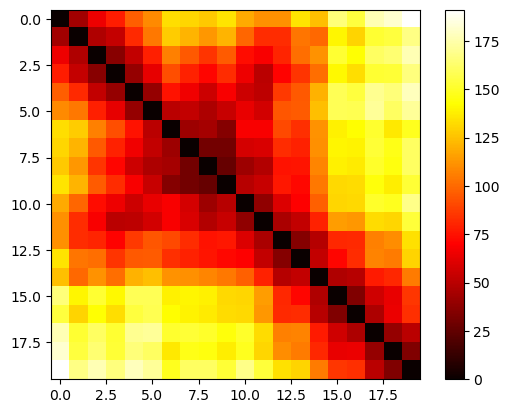

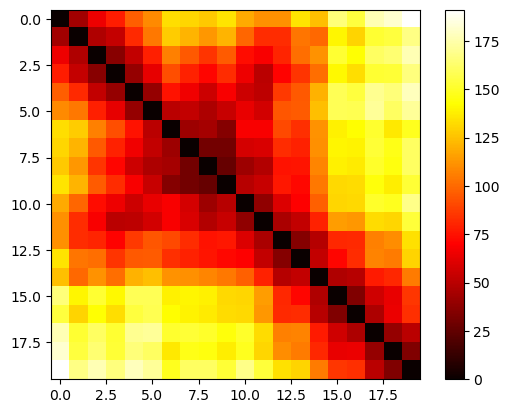

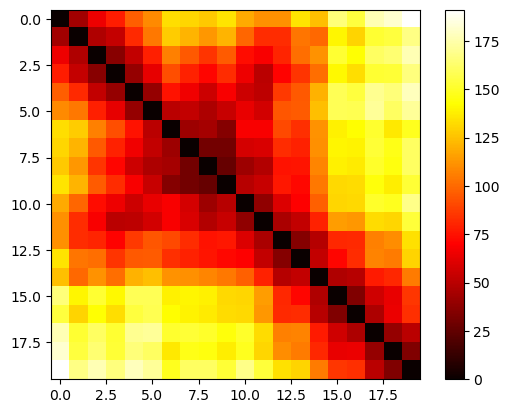

In [38]:
for m in means:
    visualize_dmap_flatten(m)

In [7]:
def prediction_error(predicted_flat_dmaps, true_flat_dmaps):
    err = cdist(predicted_flat_dmaps, true_flat_dmaps)/num_monomers**2
    r, c = linear_sum_assignment(err)
    return err[r, c].mean()

In [8]:
num_observation_list = np.array(num_observation_list)

In [9]:
true_weights = num_observation_list/num_observation_list.sum()
true_models = [generate_flatten_distance_map(x) for x in template_chain_list]

In [30]:
true_params = np.log(true_weights.reshape([-1, 1])) * true_models

In [23]:
predicted_params = np.log(weights.reshape([-1, 1])) * means 

In [24]:
prediction_error(true_params, predicted_params)

9.225929342464458

In [11]:
import multiprocessing
from functools import partial

In [12]:
def run_bgmm(n_components):
    bgmm = BayesianGaussianMixture(
    n_components=n_components,      # Maximum number of components
    covariance_type='spherical', # Type of covariance parameters
    max_iter=1000,         # Maximum number of iterations  
    verbose=True 
    )
    bgmm.fit(observation_flatten)
    
    return bgmm 


In [13]:
n_components_list = [1, 10, 50, 90, 100, 110, 150, 200]
model_list = [[] for i in range(len(n_components_list))]
err_list = [[] for i in range(len(n_components_list))]
for i_iter in tqdm(range(10)):
    with multiprocessing.Pool(10) as p:
        res = p.map(run_bgmm, n_components_list)
        for i, r in enumerate(res):
            model_list[i].append(r)
    

  0%|          | 0/10 [00:00<?, ?it/s]

Initialization 0
Initialization 0
Initialization 0
Initialization 0
Initialization 0
Initialization 0
Initialization 0
Initialization 0
Initialization converged: True
Initialization converged: True
Initialization converged: True
Initialization converged: True
Initialization converged: True
Initialization converged: True
Initialization converged: True
Initialization converged: True
Initialization 0
Initialization 0
Initialization 0Initialization 0

Initialization 0
Initialization 0
Initialization 0
Initialization 0
Initialization converged: True
Initialization converged: True
Initialization converged: True
Initialization converged: True
Initialization converged: True
Initialization converged: True
Initialization converged: True
Initialization converged: True
Initialization 0
Initialization 0
Initialization 0
Initialization 0
Initialization 0
Initialization 0
Initialization 0
Initialization 0
Initialization converged: True
Initialization converged: True
Initialization converged: True
Ini

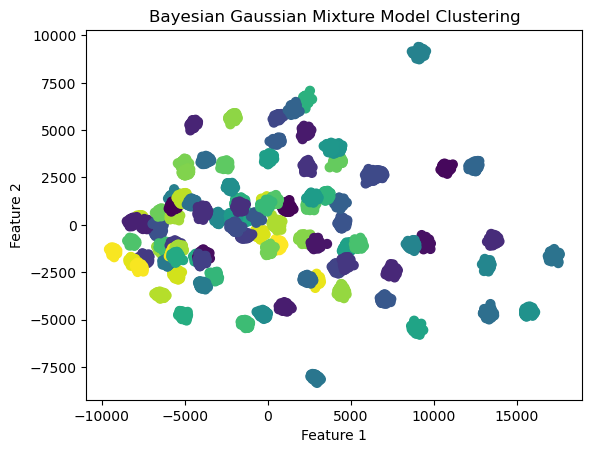

In [21]:
m = model_list[3][0]


# Predict the labels of the data
labels = m.predict(observation_flatten)

# Plot the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=40, cmap='viridis')
plt.title('Bayesian Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

weights = 

In [31]:
err_list = [[] for i in range(len(n_components_list))]
for i, n_comp_model in enumerate(model_list):
    for m in n_comp_model:
        # Accessing model parameters
        weights = m.weights_
        means = m.means_
        covariances = m.covariances_
        conv = m.converged_
        
        predicted_params = np.log(weights.reshape([-1, 1])) * means 
        err_list[i].append(prediction_error(true_params, predicted_params))

In [62]:
err_list = [[] for i in range(len(n_components_list))]
for i, n_comp_model in enumerate(model_list):
    for m in n_comp_model:
        # Accessing model parameters
        weights = m.weights_
        means = m.means_
        covariances = m.covariances_
        conv = m.converged_
        
        predicted_params = weights.reshape([-1, 1]) 
        err_list[i].append(prediction_error(predicted_params, true_weights.reshape([-1, 1])))

In [63]:
err_list = np.array(err_list)
err_list.shape

(8, 10)

In [33]:
err_list.mean(axis=1)

array([ 5.08298913, 20.24951237, 71.78525755,  0.27520622,  0.27426054,
        0.14804109,  0.14955715,  0.15431688])

In [19]:
err_list.std(axis=1)

array([2.22044605e-16, 0.00000000e+00, 0.00000000e+00, 2.16840434e-19,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.42101086e-20])

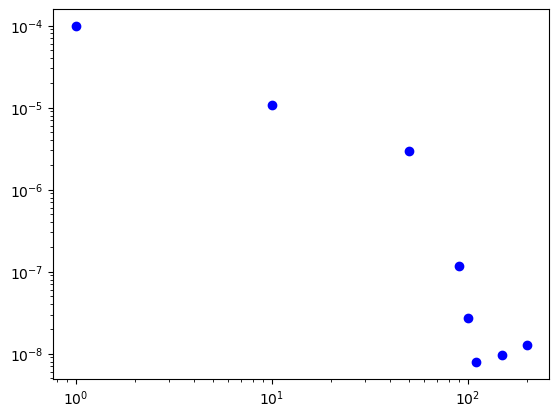

In [64]:
plt.loglog([1, 10, 50, 90, 100, 110, 150, 200], err_list.mean(axis=1), 'bo')

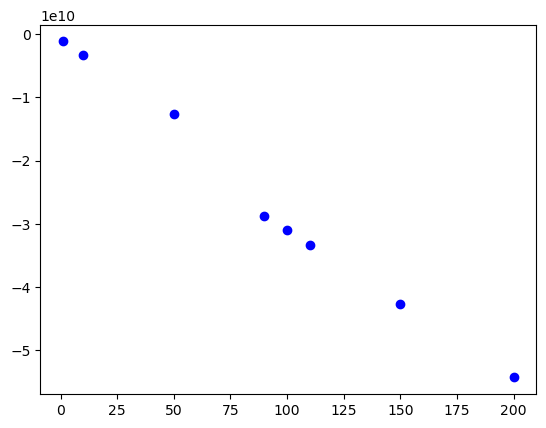

In [37]:
elbo_list = [[] for i in range(len(n_components_list))]
for i, n_comp_model in enumerate(model_list):
    for m in n_comp_model:
        # Accessing model parameters
        score = m.lower_bound_
        elbo_list[i].append(score)
        
elbo_list = np.array(elbo_list)
plt.plot([1, 10, 50, 90, 100, 110, 150, 200], elbo_list.mean(axis=1), 'bo')

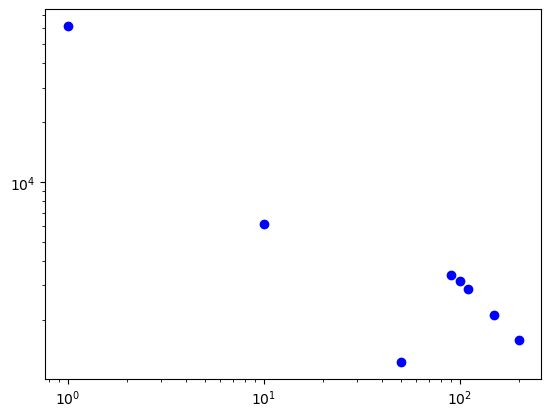

In [44]:
score_list = [[] for i in range(len(n_components_list))]
for i, n_comp_model in enumerate(model_list):
    for m in n_comp_model:
        # Accessing model parameters
        score = m.score(observation_flatten)
        score_list[i].append(score)
        
score_list = np.array(score_list)
plt.loglog([1, 10, 50, 90, 100, 110, 150, 200], -score_list.mean(axis=1)/np.array([1, 10, 50, 90, 100, 110, 150, 200]), 'bo')

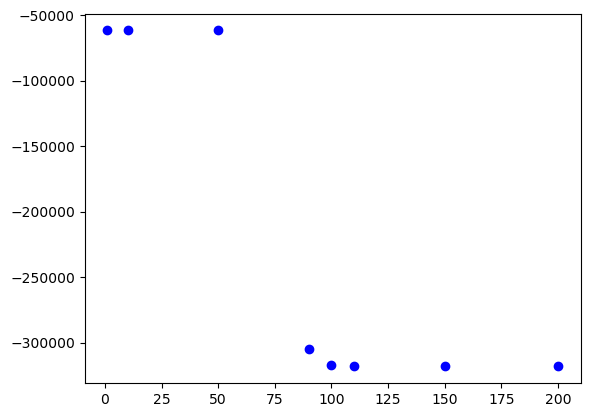

In [48]:
plt.plot([1, 10, 50, 90, 100, 110, 150, 200], score_list.mean(axis=1), 'bo')

In [52]:
def _n_parameters(m, X):
    _, n_features = m.means_.shape
    # Number of effective components equals the number of unique labels
    n_effect_comp = len(np.unique(m.predict(X)))
    if m.covariance_type == 'full':
        cov_params = n_effect_comp * n_features * (n_features + 1) / 2.
    elif m.covariance_type == 'diag':
        cov_params = n_effect_comp * n_features
    elif m.covariance_type == 'tied':
        cov_params = n_features * (n_features + 1) / 2.
    elif m.covariance_type == 'spherical':
        cov_params = n_effect_comp
    mean_params = n_features * n_effect_comp
    return int(cov_params + mean_params + n_effect_comp - 1)

/mnt/sw/nix/store/gpkc8q6zjnp3n3h3w9hbmbj6gjbxs85w-python-3.10.10-view/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  func(*args, **kwargs)


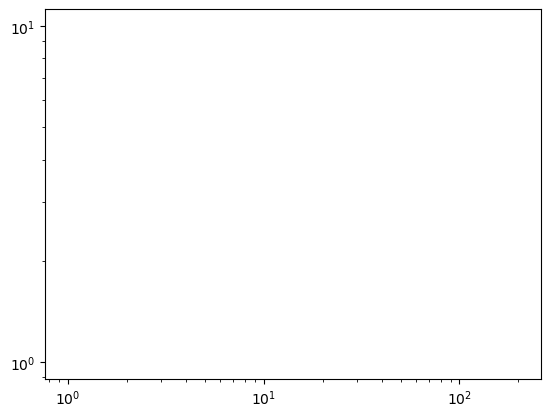

In [53]:
score_list = [[] for i in range(len(n_components_list))]
for i, n_comp_model in enumerate(model_list):
    for m in n_comp_model:
        # Accessing model parameters
        X = np.array(observation_flatten)
        score = m.score(X)
        n_params = _n_parameters(m, X)
        bic = -2 * score * X.shape[0] + n_params * np.log(X.shape[0])
        score_list[i].append(bic)
        
score_list = np.array(score_list)


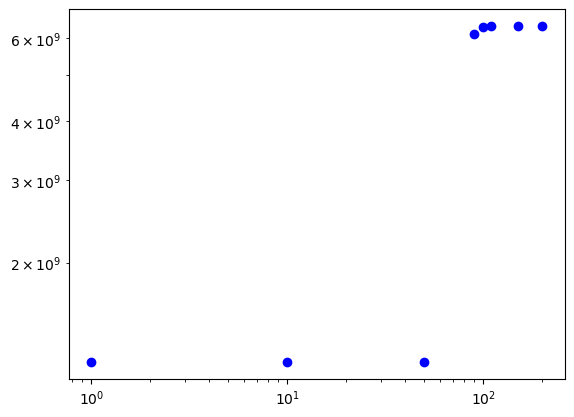

In [54]:
plt.loglog([1, 10, 50, 90, 100, 110, 150, 200], score_list.mean(axis=1), 'bo')

In [86]:
err_list = []
for i in tqdm():
    bgmm = BayesianGaussianMixture(
        n_components=i,      # Maximum number of components
        covariance_type='spherical', # Type of covariance parameters
        max_iter=1000,         # Maximum number of iterations  
        verbose=True 
    )
    bgmm.fit(observation_flatten)

    # Accessing model parameters
    weights = bgmm.weights_
    means = bgmm.means_
    covariances = bgmm.covariances_
    conv = bgmm.converged_

    predicted_params = weights.reshape([-1, 1]) * means 
    err_list.append(prediction_error(true_params, predicted_params))

  0%|          | 0/8 [00:00<?, ?it/s]

Initialization 0
Initialization converged: True
Initialization 0
  Iteration 10
Initialization converged: True
Initialization 0
  Iteration 10
Initialization converged: True
Initialization 0
Initialization converged: True
Initialization 0
Initialization converged: True
Initialization 0
Initialization converged: True
Initialization 0
Initialization converged: True
Initialization 0
Initialization converged: True


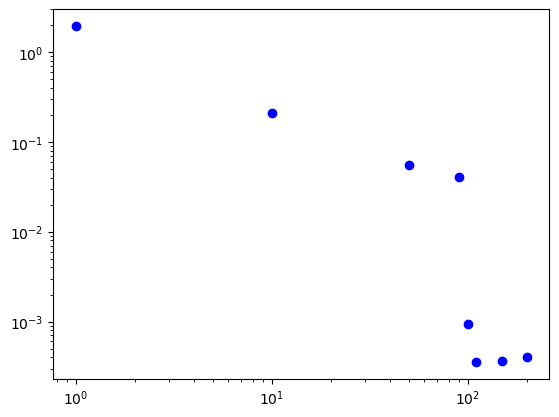

In [89]:
plt.loglog([1, 10, 50, 90, 100, 110, 150, 200], err_list, 'bo')

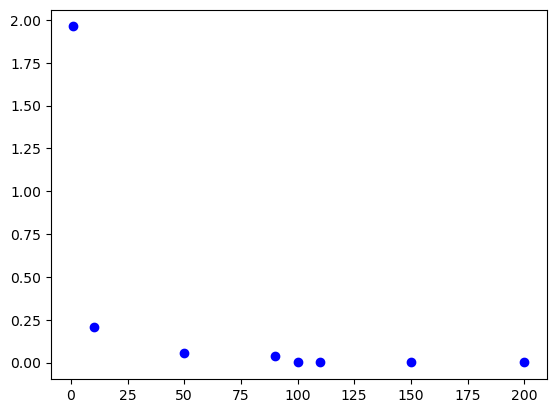

In [91]:
plt.plot([1, 10, 50, 90, 100, 110, 150, 200], err_list, 'bo')